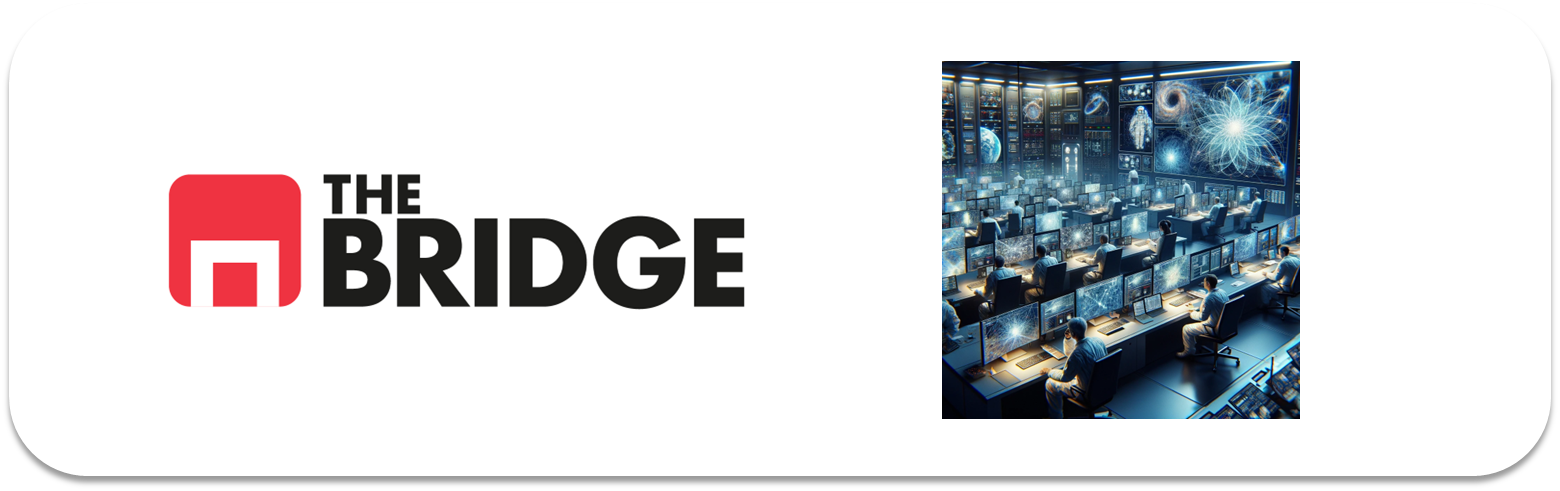

## PRACTICA OBLIGATORIA: **Redes Convolucionales**

* La práctica obligatoria de esta unidad consiste en un ejercicio de construcción de una red convolucional con Keras para la clasificación de imagenes de simpáticos perretes y gatetes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [113]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd 

from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from keras.models import Sequential
from keras.optimizers import Adam
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from skimage.io import imread

### Problema de Negocio y dataset

Una conocida empresa de información inmobiliaria utiliza un CAPTCHA visual de perros y gatos para detectar webscrappings intensivos y ataques de denegación de servicio. Últimamente, ha detectado que su sistema está empezando a flojear, es decir que hay muchos sistemas de detección automática de imágenes que son capaces de detectar que es un perro y un gato y salterse el CAPTCHA antirobots. Por eso nos ha pedido que entrenemos un modelo potente de clasificación que emule a estos sistemas con el objetivo de emplear como fotografías para el CAPTCHA aquellas que no sepa detectar este sistema emulador de chicos malos.  

Pues manos a la obra, tenemos que seleccionar en un conjunto de 1000 imágenes aquellas que peor se le daría clasificar a un potencial sistema anti-CAPTCHA.  

Para ello vamos a emplear un conjunto de train de 4000 imágenes de perretes y gatetes que se encuentran distribuidas en "data" en cuatro directorios "github_train_0",  "github_train_1", "githun_train_2" y "github_train_3". Los datos de las imagenes que tenemos que clasificar y luego seleccionar como las más "difíciles" están en "data" en el directorio "github_test".


### Se pide

1. Crear los datasets X,y de train y test, leyendo las imágenes de los directorios correspondientes (tendrás que leer todas las imágenes de los cuatro directorios para train) y a la vez que se leen adpatar su resolución para que todas tengan un tamaño de 32x32. En este caso puedes adaptar las funciones de los ejercicios de la unidad. NOTA: Ten en cuenta que la clase a la que pertenece en la foto está en el nombre del archivo.

2. Crea un modelo DL basado en redes convolucionales con al menos dos juegos Convolucional-Pooling. Sigue todo el proceso de ML (visualización del dataset, MiniEDA, Construcción del modelo)

3. Entrenar el modelo con un callback de Earlystopping con paciencia la que tengas :-). Muestra su historial de entrenamiento.

4. Evalua el modelo, haz un reporte de clasificacion y muestra la matriz de confianza.

5. Es el momento de seleccionar las imagenes: Selecciona el 10% de imágenes mal clasificadas de una y otra clase que tengan el mayor nivel de confianza de que pertenencían a la clase errónea. Es decir las imágenes de perros clasificadas como gatos y con la probabilidad de ser perror más alta.


### Extra (para hacer en clase)

Repite los pasos 3 a 5 utilizando el generador de imágenes sintéticas o Image Augmentation de Keras. 



In [114]:
ROOT_PATH = './data/'
TRAIN_PATH = [f"{ROOT_PATH}github_train_{i}" for i in range(0, 4)]
TEST_PATH = ROOT_PATH + "github_test/"

In [115]:
def read_data(directorios, reshape_dim=(32, 32)):

    X = [] 
    y = []

    if isinstance(directorios, str):
        directorios = [directorios]

    for directorio in directorios:
        for file in os.listdir(directorio):
            file_path = os.path.join(directorio, file)
            if os.path.isfile(file_path):
                # print(f"Procesando archivo: {file_path}")
                image = imread(file_path)
                image = cv2.resize(image, reshape_dim)  # Redimensionamos las imágenes a 32x32
                X.append(image)
                y.append(file.split(".")[0])  # Cat o Dog antes del punto 

    return np.array(X), np.array(y)

In [116]:
X_train, y_train = read_data(TRAIN_PATH)
X_test, y_test = read_data(TEST_PATH)

In [117]:
X_train.shape

(4000, 32, 32, 3)

In [118]:
y_train.shape

(4000,)

In [119]:
X_test.shape

(1000, 32, 32, 3)

In [120]:
y_test.shape

(1000,)

In [121]:
pd.Series(y_train).value_counts()

cat    2000
dog    2000
Name: count, dtype: int64

In [122]:
X_train = X_train/255
X_test = X_test/255

In [123]:
y_train_num = np.array(list(map(lambda x: 0 if x == 'cat' else 1, y_train)))
y_test_num = np.array(list(map(lambda x: 0 if x == 'cat' else 1, y_test)))

In [124]:
model = Sequential()

In [125]:
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (32,32,3))) # Fijate en dos cosas, en la el input_shape (ancho,alto,num_canales) 
                                                            # y en que no decimos nada de strides (el argumento para el stride), porque por defecto está a (1,1)

In [126]:
model.add(MaxPool2D(pool_size=(2,2), strides = (2,2)))

In [127]:
model.add(Dropout(rate= 0.25))

In [128]:
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))

model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Dropout(0.25))

In [129]:
model.add(Flatten()) 
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [130]:
X_train.size

12288000

In [131]:
optimizer = Adam()

In [132]:
model.compile(optimizer = optimizer , loss = "sparse_categorical_crossentropy", metrics=["accuracy"])

In [133]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 8)      │           608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16, 16, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 8, 8, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,746 (1.02 MB)

 Trainable params: 266,746 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [134]:
batch_size = 128
epochs = 20
validation_split = 0.2

In [135]:
history = model.fit(X_train, y_train_num, batch_size = batch_size, epochs= epochs, validation_split= validation_split)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.4639 - loss: 1.3656 - val_accuracy: 0.0025 - val_loss: 0.8767
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5898 - loss: 0.6941 - val_accuracy: 0.0463 - val_loss: 0.8398
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5947 - loss: 0.6782 - val_accuracy: 0.1488 - val_loss: 0.8079
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6253 - loss: 0.6571 - val_accuracy: 0.8062 - val_loss: 0.6168
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6191 - loss: 0.6544 - val_accuracy: 0.1937 - val_loss: 0.8111
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6371 - loss: 0.6383 - val_accuracy: 0.3825 - val_loss: 0.7817
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6463 - loss: 0.6242 - val_accuracy: 0.3137 - val_loss: 0.8502
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6720 - loss: 0.5954 - val_accuracy: 0.5813 - v

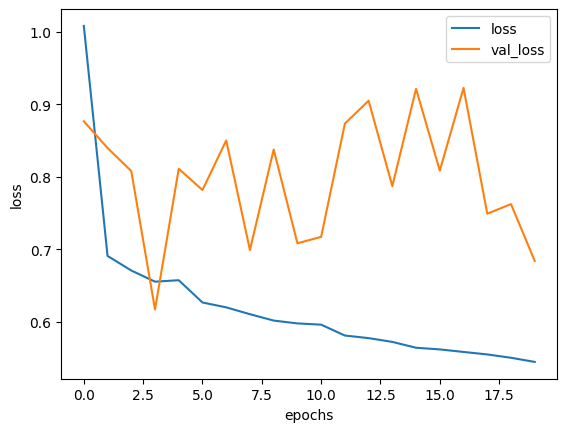

In [136]:
history_df = pd.DataFrame(history.history)
history_df[["loss","val_loss"]].plot();
plt.xlabel("epochs")
plt.ylabel("loss");

In [137]:
history_df

,accuracy,loss,val_accuracy,val_loss
0,0.531250,1.008370,0.00250,0.876673
1,0.600625,0.690720,0.04625,0.839801
2,0.611562,0.670613,0.14875,0.807857
3,0.626250,0.655190,0.80625,0.616828
4,0.620938,0.657180,0.19375,0.811078
5,0.648125,0.626430,0.38250,0.781727
6,0.651563,0.619708,0.31375,0.850195
7,0.661875,0.610264,0.58125,0.698887
8,0.668437,0.601456,0.37875,0.837713
9,0.675937,0.597540,0.55000,0.708191


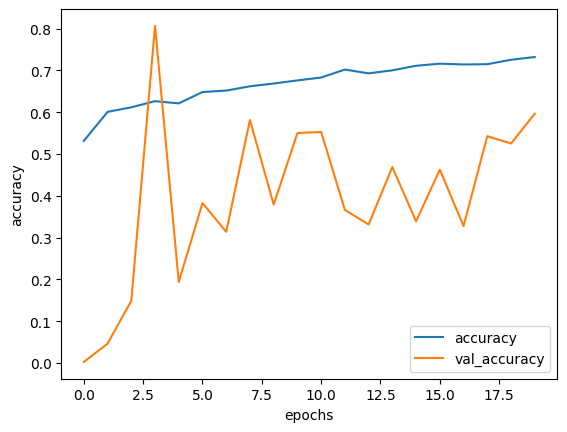

In [138]:
history_df = pd.DataFrame(history.history)
history_df[["accuracy","val_accuracy"]].plot();
plt.xlabel("epochs")
plt.ylabel("accuracy");

In [139]:
model.evaluate(X_test,y_test_num)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7446 - loss: 0.5195


[0.5831955075263977, 0.6859999895095825]

In [140]:
y_pred = [np.argmax(prediction) for prediction in  model.predict(X_test)]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [141]:
print(classification_report(y_test_num,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.78      0.71       500
           1       0.73      0.59      0.65       500

    accuracy                           0.69      1000
   macro avg       0.69      0.69      0.68      1000
weighted avg       0.69      0.69      0.68      1000



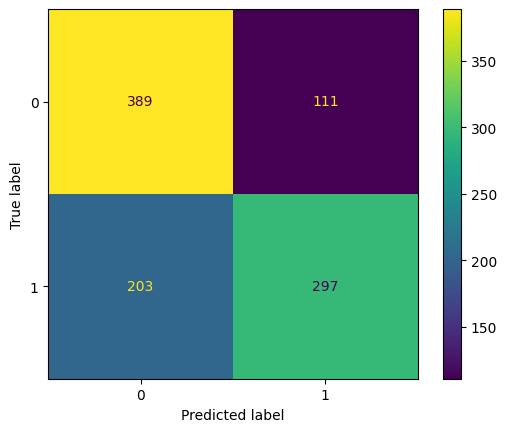

In [142]:
ConfusionMatrixDisplay.from_predictions(y_test_num, y_pred)

In [143]:
y_proba = model.predict(X_test)
y_pred = np.argmax(y_proba, axis=1)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [144]:
misclassified_mask = y_pred != y_test_num

misclassified_indices = np.where(misclassified_mask)[0]

In [145]:
misclassified_data = pd.DataFrame({
    'index': misclassified_indices,
    'true_label': y_test_num[misclassified_mask],
    'predicted_label': y_pred[misclassified_mask],
    'probability': [y_proba[i, y_pred[i]] for i in misclassified_indices]
})

# Filtrar imágenes mal clasificadas de una clase a otra
dogs_as_cats = misclassified_data[(misclassified_data['true_label'] == 1) & (misclassified_data['predicted_label'] == 0)]
cats_as_dogs = misclassified_data[(misclassified_data['true_label'] == 0) & (misclassified_data['predicted_label'] == 1)]

# Ordenar por la probabilidad de la clase predicha
dogs_as_cats_sorted = dogs_as_cats.sort_values(by='probability', ascending=False)
cats_as_dogs_sorted = cats_as_dogs.sort_values(by='probability', ascending=False)

# Seleccionar el 10% superior
top_10_percent_dogs_as_cats = dogs_as_cats_sorted.head(int(0.1 * len(dogs_as_cats_sorted)))
top_10_percent_cats_as_dogs = cats_as_dogs_sorted.head(int(0.1 * len(cats_as_dogs_sorted)))

# Obtener los índices de las imágenes seleccionadas
selected_indices = np.concatenate([top_10_percent_dogs_as_cats['index'], top_10_percent_cats_as_dogs['index']])


In [146]:
selected_images = X_test[selected_indices]
selected_labels = y_test_num[selected_indices]
selected_pred_labels = y_pred[selected_indices]

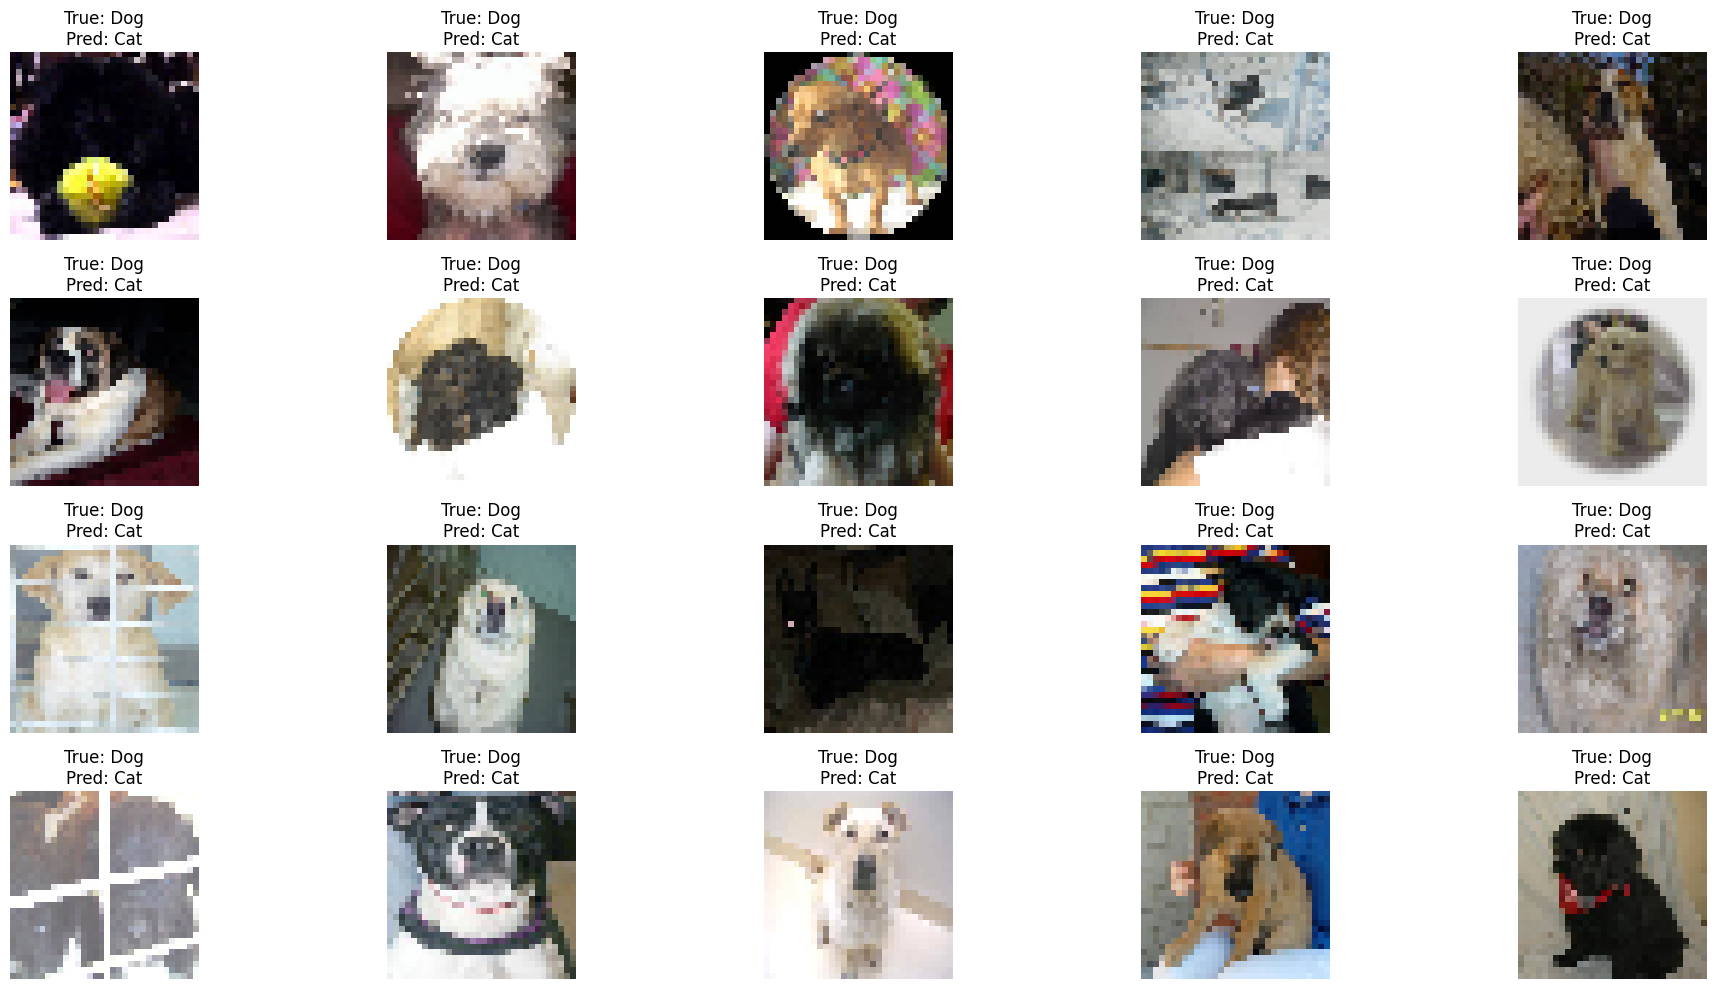

In [147]:
def plot_images(images, true_labels, predicted_labels, class_names, num_images=20):
    """
    Función para mostrar imágenes con sus etiquetas verdaderas y predichas.

    Args:
    - images: Array de imágenes.
    - true_labels: Array de etiquetas verdaderas.
    - predicted_labels: Array de etiquetas predichas.
    - class_names: Lista de nombres de clases.
    - num_images: Número de imágenes a mostrar (por defecto 20).
    """
    plt.figure(figsize=(20, 10))
    for i in range(min(num_images, len(images))):
        plt.subplot(4, 5, i + 1)
        plt.imshow(images[i])
        plt.title(f"True: {class_names[true_labels[i]]}\nPred: {class_names[predicted_labels[i]]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Asumiendo que los nombres de clases son 'Cat' y 'Dog'
class_names = ['Cat', 'Dog']

# Mostrar las imágenes seleccionadas
plot_images(selected_images, selected_labels, selected_pred_labels, class_names, num_images=20)